# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [2]:
# Loading dataset into a DataFrame
df = pd.read_csv(r"C:\Users\DELL\advertising.csv", encoding='iso-8859-1')


In [3]:
df.shape

(200, 4)

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

# Feature Engineering


In [8]:
df['TV_squared'] = df['TV'] ** 2
df['Radio_squared'] = df['Radio'] ** 2
df['Newspaper_squared'] = df['Newspaper'] ** 2
df['TV_Radio'] = df['TV'] * df['Radio']
df['TV_Newspaper'] = df['TV'] * df['Newspaper']
df['Radio_Newspaper'] = df['Radio'] * df['Newspaper']

# Data Visualize

### Distribution of TV_squared


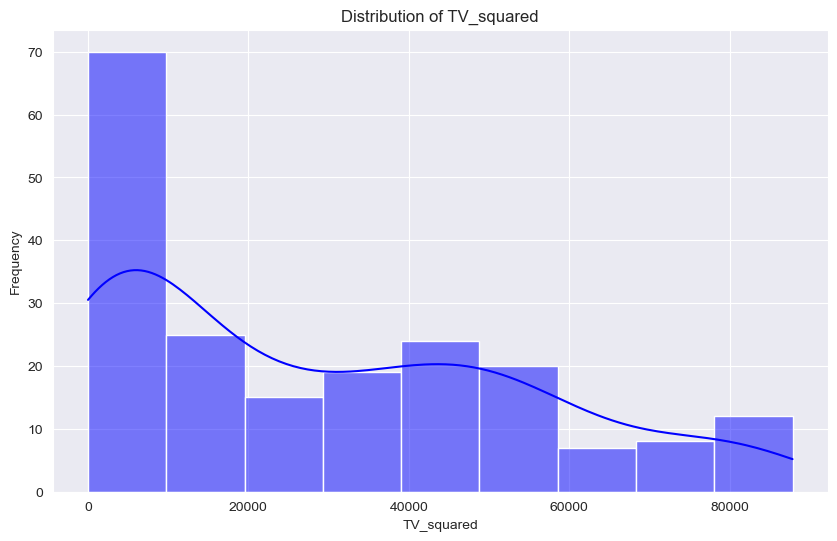

In [9]:
# Plot Distribution of TV_squared
plt.figure(figsize=(10, 6))
sns.histplot(df['TV_squared'], kde=True, color='blue')
plt.title('Distribution of TV_squared')
plt.xlabel('TV_squared')
plt.ylabel('Frequency')
plt.show()


### Distribution of Radio_squared

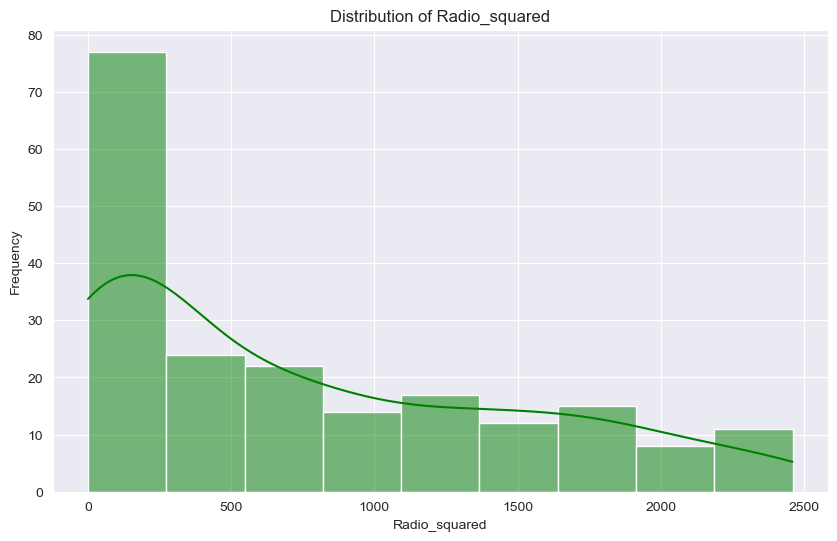

In [10]:
# Plot Distribution of Radio_squared
plt.figure(figsize=(10, 6))
sns.histplot(df['Radio_squared'], kde=True, color='green')
plt.title('Distribution of Radio_squared')
plt.xlabel('Radio_squared')
plt.ylabel('Frequency')
plt.show()


### Box Plot for TV_squared

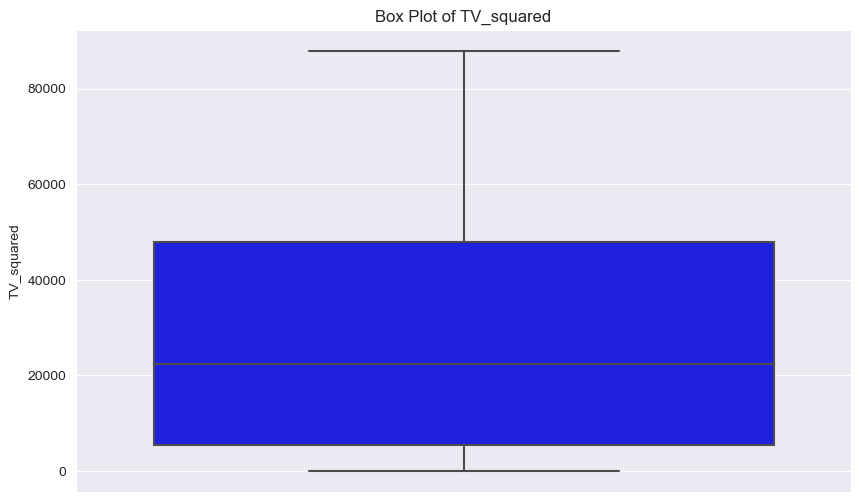

In [11]:
# Box Plot for TV_squared
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['TV_squared'], color='blue')
plt.title('Box Plot of TV_squared')
plt.ylabel('TV_squared')
plt.show()


### Pair Plot including engineered features

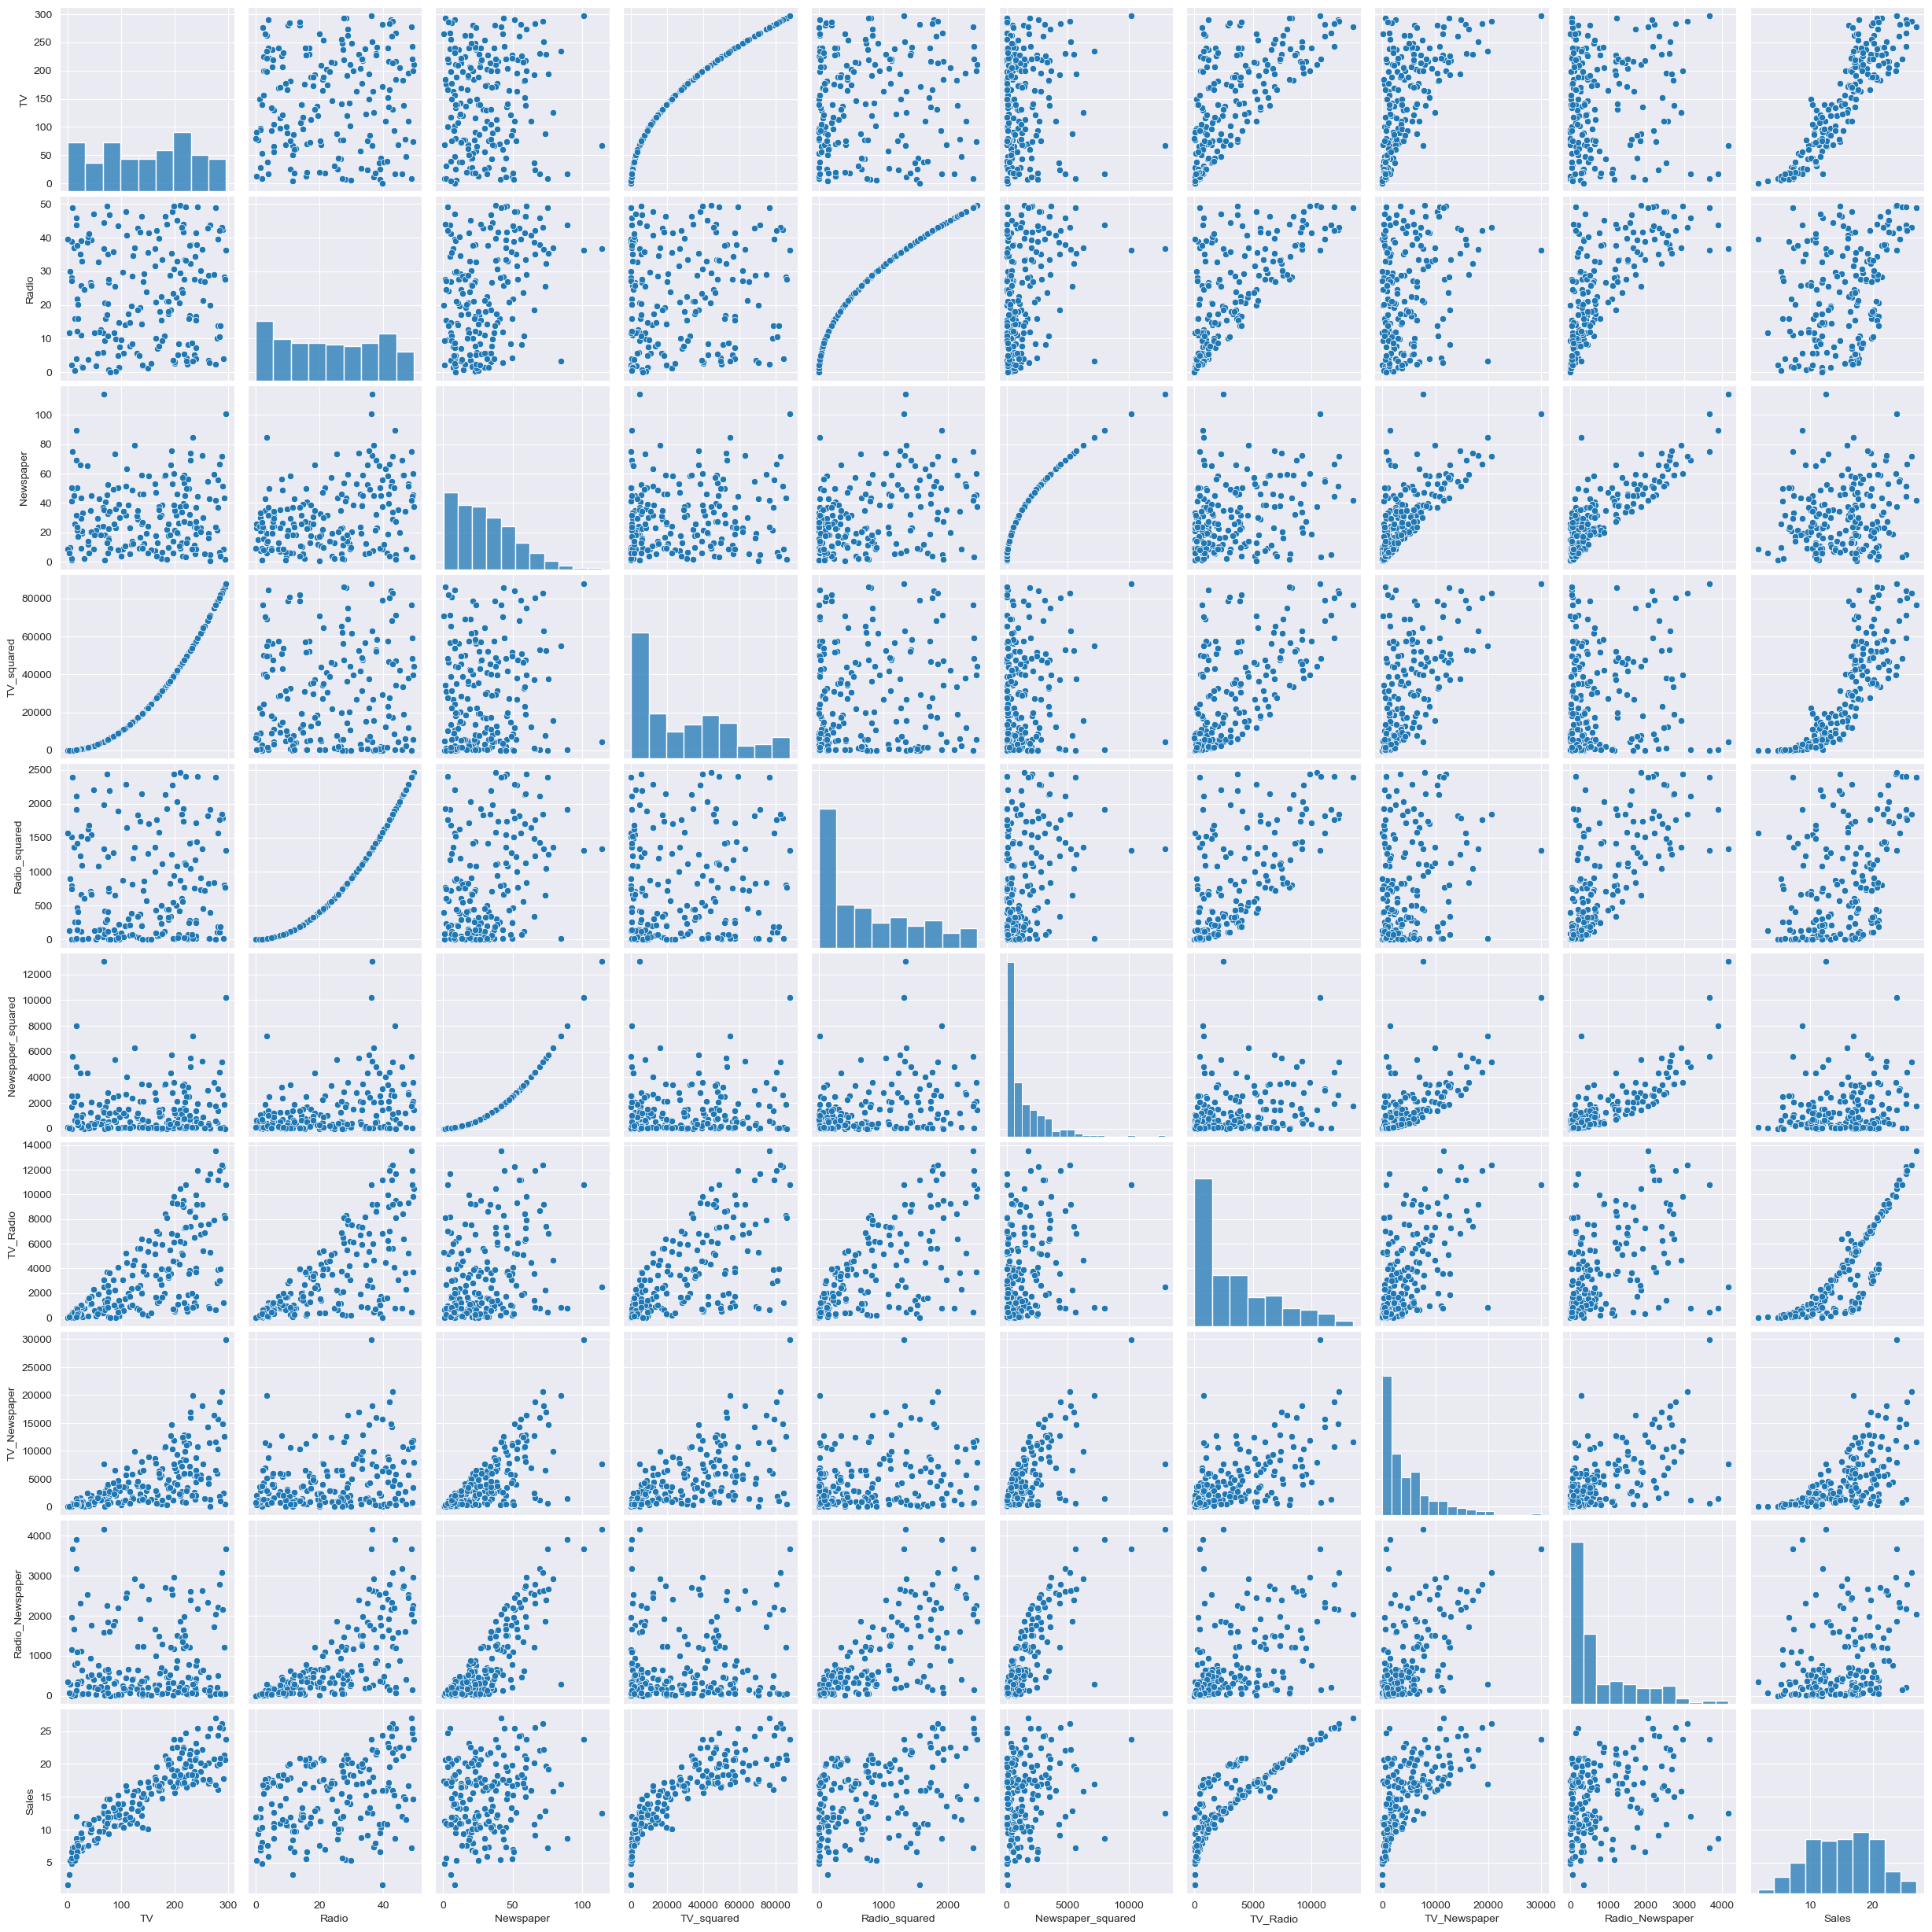

In [12]:
# Pair Plot including engineered features
sns.pairplot(df[['TV', 'Radio', 'Newspaper', 'TV_squared', 'Radio_squared', 'Newspaper_squared', 'TV_Radio', 'TV_Newspaper', 'Radio_Newspaper', 'Sales']])
plt.show()


### Correlation Heatmap


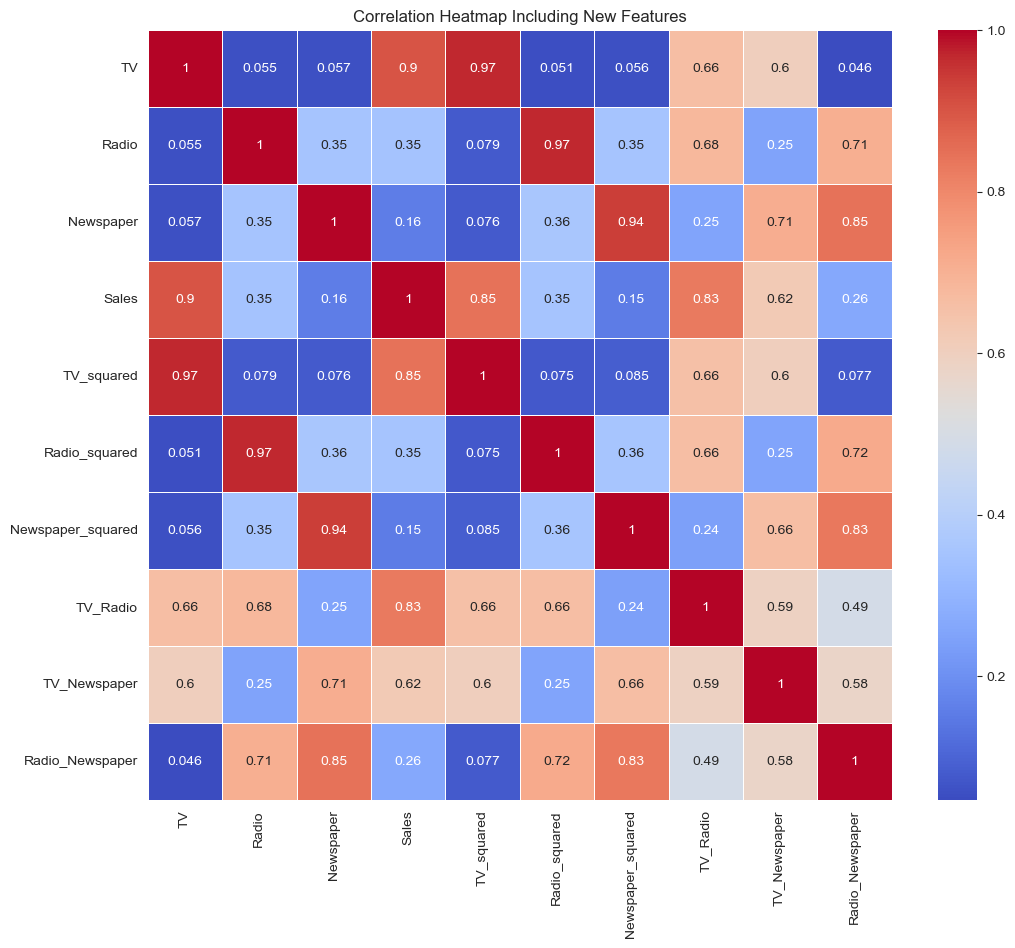

In [13]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap Including New Features')
plt.show()


### Scatter plot matrix focusing on Sales


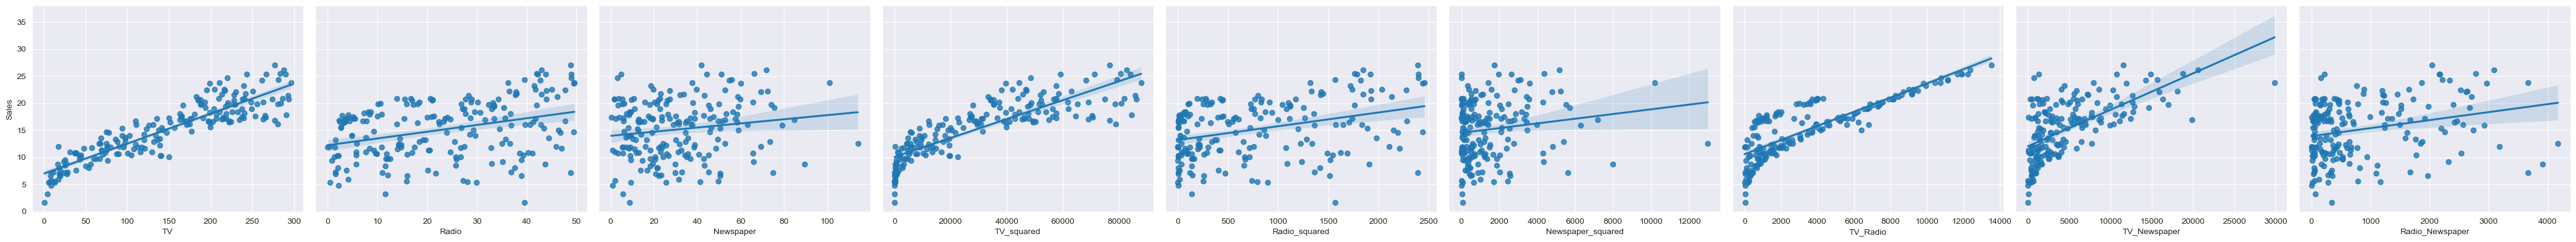

In [14]:
# Scatter plot matrix focusing on Sales
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper', 'TV_squared', 'Radio_squared', 'Newspaper_squared', 'TV_Radio', 'TV_Newspaper', 'Radio_Newspaper'], y_vars='Sales', height=4, aspect=1.2, kind='reg')
plt.show()


### Violin Plot for TV_squared


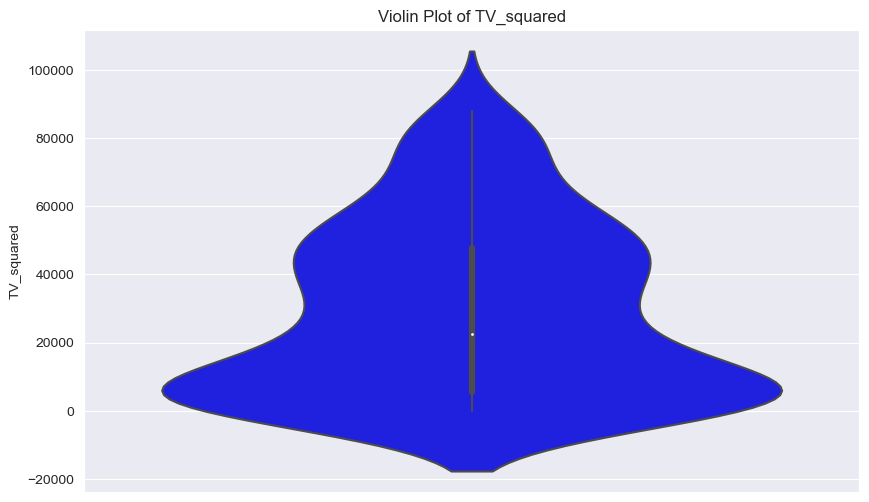

In [17]:
# Violin Plot for TV_squared
plt.figure(figsize=(10, 6))
sns.violinplot(y=df['TV_squared'], color='blue')
plt.title('Violin Plot of TV_squared')
plt.ylabel('TV_squared')
plt.show()


# Feature Scaling


In [18]:
# Define features and target
features = ['TV', 'Radio', 'Newspaper', 'TV_squared', 'Radio_squared', 'Newspaper_squared', 'TV_Radio', 'TV_Newspaper', 'Radio_Newspaper']
X = df[features]
y = df['Sales']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Split Data into Training and Testing Sets


In [19]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Train the Model


In [20]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# Predictions and Evaluate


Mean Squared Error: 1.4425426369013616
R^2 Score: 0.9533174341074796


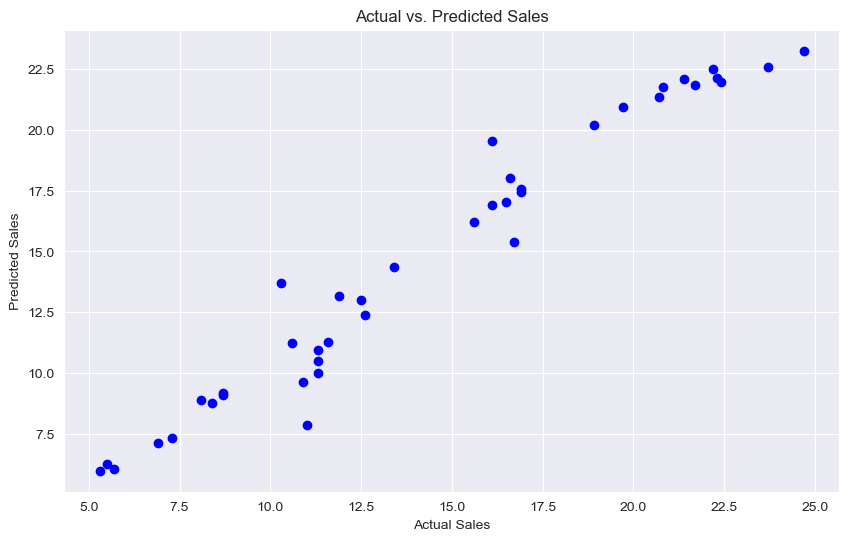

In [21]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))

# Plot predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()
